In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds

#tf.compat.v1.enable_eager_execution()


In [2]:
#mnist_train = tfds.load(name="mnist", split="train")
#assert isinstance(mnist_train, tf.data.Dataset)
#print(mnist_train)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]


11493376/11490434 [==============================] - 0s 0us/step


Label: 5


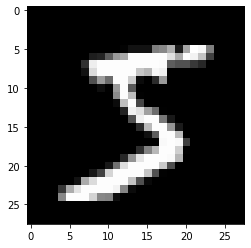

Label: 0


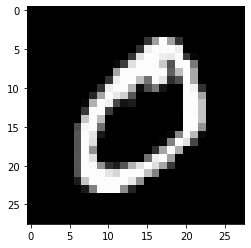

Label: 4


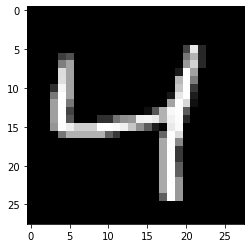

Label: 1


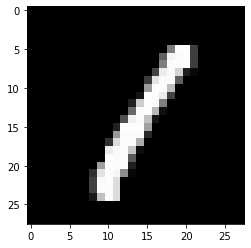

Label: 9


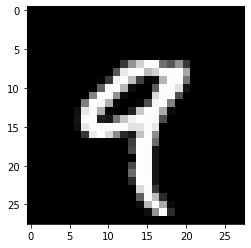

In [3]:
for i in range(5):  # Only take a single example
  plt.imshow(x_train[i].astype(np.float32), cmap=plt.get_cmap("gray"))
  print("Label: %d" % y_train[i])
  plt.show()



In [0]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9


# Build the RNN model
def build_model(allow_cudnn_kernel=True):
  # CuDNN is only available at the layer level, and not at the cell level.
  # This means `LSTM(units)` will use the CuDNN kernel,
  # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
  if allow_cudnn_kernel:
    # The LSTM layer with default options uses CuDNN.
    lstm_layer = tf.keras.layers.LSTM(units, input_shape=(None, input_dim))
  else:
    # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
    lstm_layer = tf.keras.layers.RNN(
        tf.keras.layers.LSTMCell(units),
        input_shape=(None, input_dim))
  model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size, activation='softmax')]
  )
  return model

In [6]:
model = build_model(allow_cudnn_kernel=True)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 61s 1ms/sample - loss: 1.0364 - acc: 0.6698 - val_loss: 0.6244 - val_acc: 0.8019
Epoch 2/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.4775 - acc: 0.8524 - val_loss: 0.3216 - val_acc: 0.9011
Epoch 3/5
60000/60000 [==============================] - 60s 997us/sample - loss: 0.3016 - acc: 0.9098 - val_loss: 0.7422 - val_acc: 0.7658
Epoch 4/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.2289 - acc: 0.9305 - val_loss: 0.2805 - val_acc: 0.9049
Epoch 5/5
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.1927 - acc: 0.9409 - val_loss: 0.2847 - val_acc: 0.9054


In [8]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


10000/10000 - 4s - loss: 0.2847 - acc: 0.9054

Test accuracy: 0.9054


In [9]:
predictions = model.predict(x_test)
print(predictions[i])

[1.4018520e-05 1.1095576e-04 1.2690803e-07 9.0237577e-08 9.9825591e-01
 6.7319029e-06 1.4269786e-03 5.7680604e-06 1.2507123e-06 1.7806511e-04]


In [0]:
class_names = ["zero", "one", "two", "three", "four", "five", "six", "seven", 
               "eight", "nine"]
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


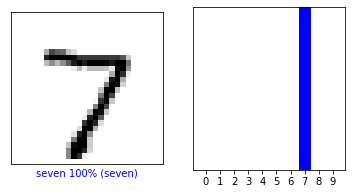

In [11]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()


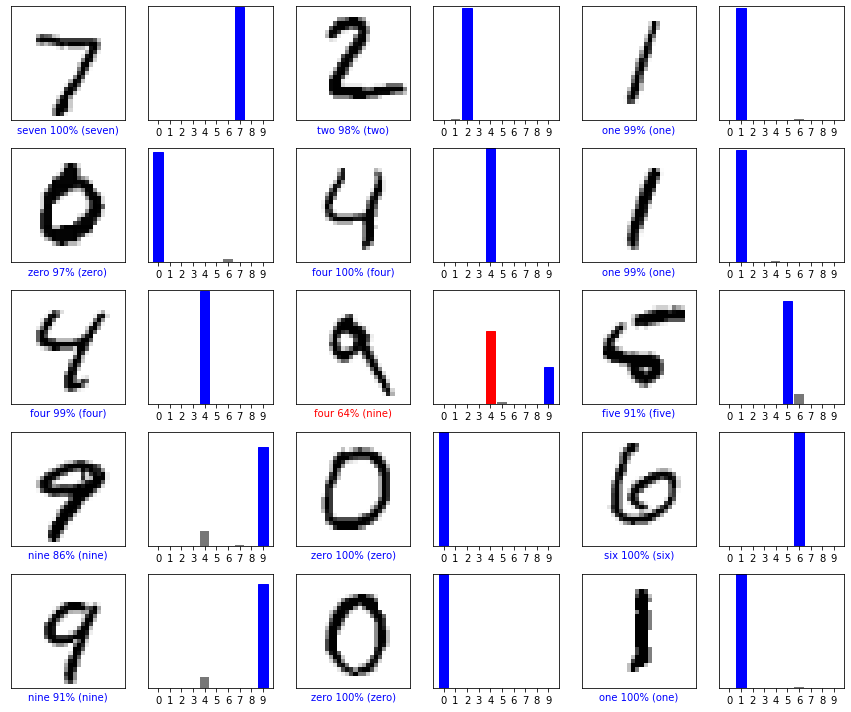

In [12]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()
